In [1]:
import numpy as np
import requests
import pandas as pd
from cStringIO import StringIO
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


We start with the merged DR25 stellar catalog with supplemental properties

In [2]:
dr25Stellar=pd.read_csv("stellarCatalogs/dr25_stellar_updated_feh_all.txt");
# dr25Stellar=pd.read_csv("stellarCatalogs/dr25_stellar_updated_feh.txt");
cleanDr25Stellar = dr25Stellar;
print(str(len(cleanDr25Stellar)) + " entries")

200038 entries


Apply the Burke cuts

Next we remove stars that are on the list https://github.com/nasa/KeplerPORTs/blob/master/DR25_DEModel_NoisyTargetList.txt.

In [3]:
noisyTargets = pd.read_csv("data/DR25_DEModel_NoisyTargetList.txt", header=9)
cleanDr25Stellar = cleanDr25Stellar[~cleanDr25Stellar.kepid.isin(noisyTargets['# 1- Kepler ID'])]
print(str(len(cleanDr25Stellar)) + " entries after removing noisy targets")

191409 entries after removing noisy targets


Next we remove stars with radii > 1.35 Rsun (to match what Chris is currently doing - the KSCI recommends 1.25 Rsun).

In [4]:
    cleanDr25Stellar = cleanDr25Stellar[cleanDr25Stellar.radius <= 1.35]
    print(str(len(cleanDr25Stellar)) + " entries after removing R>1.35 targets")


141591 entries after removing R>1.35 targets


Next we remove stars with nan limb darkening coefficients.

In [5]:
cleanDr25Stellar = cleanDr25Stellar[~np.isnan(cleanDr25Stellar.limbdark_coeff1)]
cleanDr25Stellar = cleanDr25Stellar[~np.isnan(cleanDr25Stellar.limbdark_coeff2)]
cleanDr25Stellar = cleanDr25Stellar[~np.isnan(cleanDr25Stellar.limbdark_coeff3)]
cleanDr25Stellar = cleanDr25Stellar[~np.isnan(cleanDr25Stellar.limbdark_coeff4)]
print(str(len(cleanDr25Stellar)) + " entries after removing Nan limb darkening targets")


140969 entries after removing Nan limb darkening targets


Next we remove stars with duty cycle = nan.

In [6]:
cleanDr25Stellar = cleanDr25Stellar[~np.isnan(cleanDr25Stellar.dutycycle)]
print(str(len(cleanDr25Stellar)) + " entries after removing Nan dutycycle targets")


140969 entries after removing Nan dutycycle targets


Next we remove stars that have had a drop in duty cycle > 30% due to the removal of transits. (10% in KSCI)

In [7]:
dutyCycleChange = cleanDr25Stellar.dutycycle - cleanDr25Stellar.dutycycle_post
cleanDr25Stellar = cleanDr25Stellar[dutyCycleChange/cleanDr25Stellar.dutycycle <= 0.3]
print(str(len(cleanDr25Stellar)) + " entries after removing duty cycle drops > 0.3")


138514 entries after removing duty cycle drops > 0.3


Next we remove stars that have duty cycles < 0.6.

In [8]:
cleanDr25Stellar = cleanDr25Stellar[cleanDr25Stellar.dutycycle >= 0.6]
print(str(len(cleanDr25Stellar)) + " entries after removing after removing stars with duty cycle < 0.6")

133783 entries after removing after removing stars with duty cycle < 0.6


Next we remove stars with data span < 1000

In [9]:
cleanDr25Stellar = cleanDr25Stellar[cleanDr25Stellar.dataspan >= 1000]
print(str(len(cleanDr25Stellar)) + " entries after removing after removing stars with data span < 1000")

120728 entries after removing after removing stars with data span < 1000


Next we remove stars with the timeoutsumry flag != 1.


In [10]:
cleanDr25Stellar = cleanDr25Stellar[cleanDr25Stellar.timeoutsumry == 1]
print(str(len(cleanDr25Stellar)) + " entries after removing after removing stars with timeoutsumry != 1")

113670 entries after removing after removing stars with timeoutsumry != 1


This produces the clean master list dr25_stellar_supp_gaia_clean.txt from which we will extract specific spectral types.

We extract desired spectral types using the teff boundaries from Pecaut and Mamajek 2013 http://iopscience.iop.org/article/10.1088/0067-0049/208/1/9/meta;jsessionid=698F3A9F5272B070DC62876C1764BFDB.c1#apjs480616s3: 
M: 2400 <= T < 3900 
K: 3900 <= T < 5300
G: 5300 <= T < 6000
F: 6000 <= T < 7300

In [11]:
cleanDr25Stellar = cleanDr25Stellar[(cleanDr25Stellar.teff >= 3900)&(cleanDr25Stellar.teff < 6000)]
print(str(len(cleanDr25Stellar)) + " GK targets")
cleanDr25Stellar.to_csv("stellarCatalogs/dr25_stellar_supp_clean_GK.txt", index=False)
# cleanDr25Stellar.to_csv("stellarCatalogs/dr25_stellar_mathur_clean_GK.txt", index=False)


75541 GK targets


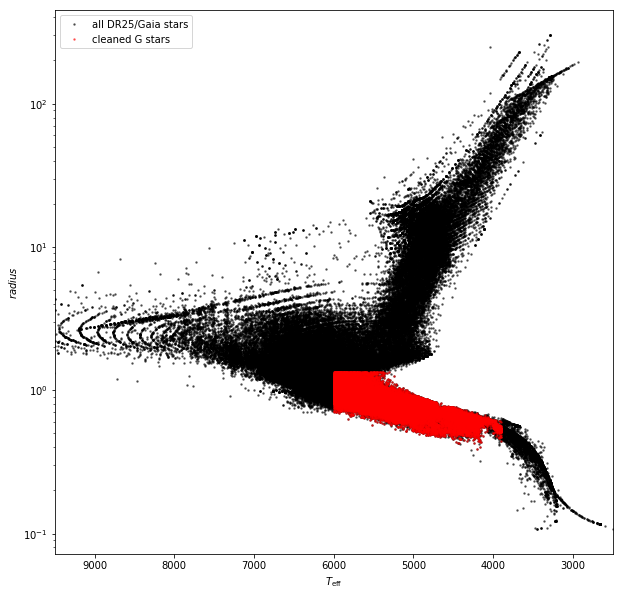

In [12]:
plt.figure(figsize=(10,10));
plt.semilogy(dr25Stellar.teff, dr25Stellar.radius, ".k", ms=3, alpha=0.5)
plt.semilogy(cleanDr25Stellar.teff, cleanDr25Stellar.radius, ".r", ms=3, alpha=0.5)
plt.xlim(9500, 2500)
plt.legend(("all DR25/Gaia stars", "cleaned G stars"));
plt.ylabel("$radius$");
plt.xlabel("$T_\mathrm{eff}$");
